In [16]:
import torch 
import torchvision
from torchvision import transforms, datasets

In [4]:
x = torch.Tensor([5,3])
y = torch.Tensor([2,1])

In [5]:
print(x*y)

tensor([10.,  3.])


In [10]:
new = torch.zeros([2,5])
print(new)
new.shape

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


torch.Size([2, 5])

In [12]:
y = torch.rand([2,3])
print(y)

tensor([[0.4703, 0.7222, 0.5561],
        [0.9479, 0.0327, 0.7625]])


In [14]:
y.view(1,6)

tensor([[0.4703, 0.7222, 0.5561, 0.9479, 0.0327, 0.7625]])

In [20]:
train = datasets.MNIST('',train = True, download = True, 
                      transform = transforms.Compose([transforms.ToTensor()]))

In [21]:
test = datasets.MNIST('',train = False, download = True, 
                      transform = transforms.Compose([transforms.ToTensor()]))

In [28]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

In [30]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [41]:
x,y = data[0][0], data[1][0]

In [42]:
import matplotlib.pyplot as plt

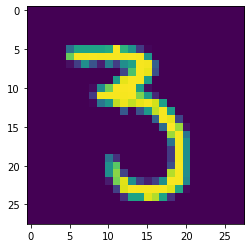

In [44]:
plt.imshow(x.view(28,28))

In [47]:
count = dict()

for data in trainset:
    Xs, Ys = data
    for y in Ys:
        y = int(y)
        count[y] = count.get(y, 0) + 1 
        

In [51]:
count

{4: 5842,
 5: 5421,
 9: 5949,
 3: 6131,
 0: 5923,
 6: 5918,
 1: 6742,
 7: 6265,
 2: 5958,
 8: 5851}

In [52]:
import torch.nn as nn
import torch.nn.functional as F

In [62]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28,64)
        self.fc2 = nn.Linear(64,64)
        self.fc3 = nn.Linear(64,64)
        self.fc4 = nn.Linear(64,10)
        
    def forward(self, x):
        # F.relu --> rectified linear activation function
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim = 1)


net = Net()

In [56]:
X = torch.rand((28,28)).view(-1,28*28)

In [64]:
output = net(X)

In [65]:
print(output)

tensor([[-2.1035, -2.3695, -2.3261, -2.1513, -2.4404, -2.1438, -2.3767, -2.3752,
         -2.4426, -2.3719]], grad_fn=<LogSoftmaxBackward0>)


In [68]:
import torch.optim as optim
# lr --> learning rate  
optimizer = optim.Adam(net.parameters(), lr = 0.001)
EPOCHS = 3 

for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch of features and labels 
        X, y = data
        # every time before pass data to model 
        # to make sure gradient don't accumulate 
        net.zero_grad()
        output = net(X.view(-1,28*28))
        # calculate loss 
        loss = F.nll_loss(output, y)
        # backpropogation
        loss.backward()
        # adjust the weight
        optimizer.step()
    print(loss)

tensor(0.0150, grad_fn=<NllLossBackward0>)
tensor(0.0694, grad_fn=<NllLossBackward0>)
tensor(0.0234, grad_fn=<NllLossBackward0>)


In [69]:
correct = 0 
total = 0 

with torch.no_grad():
    for data in trainset:
        X,y = data 
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct +=1
            total += 1
print("Accuracy", round(correct/total, 3))


    

Accuracy 0.978


<function matplotlib.pyplot.show(close=None, block=None)>

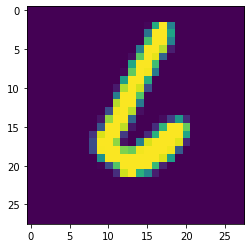

In [78]:
import matplotlib.pyplot as plt
plt.imshow(X[2].view(28,28))
plt.show

In [79]:
print(torch.argmax(net(X[2].view(-1, 784))[0]))

tensor(6)


In [82]:
torch.no_grad()